# CSCI 532 Semester Project Demonstration and Analysis

James Avery

## Problem #3

>Write a C/C++/Matlab/Java program to compute insertion sort and merge sort. (You can use the code from the textbooks by Deitel and Deitel or from the web.) Obtain the run time of both routines.

>The input data should be an int array containing random element values (between, say, 0 and 1023). Obtain run time T with 1D (input) array of size of $n = 16$, $256$, $4096$, $65536$, $1048576$ (i.e. $2^p$, where $p = 4$, $8$, $12$, $16$, $20$). The run time for each $n$ should be averaged with about $\left\lfloor{\frac{512}{p \times p}}\right\rfloor$ runs. Each run for a given $n$ should use a different random input.

>Plot (with Excel, Matlab, or other available tools) the run time for both routines on one plot, with the $x$ axis in $p$ values, and $y$ axis in $\log{T}$. Label on the plot which curve is for insertion sort and which is for merge sort.

>Submit C/C++ programs and plot, with instructions in readme.txt on how to build and run the program. (Include the Dev-C++/MS Visual Studio/Java NetBeans project file.)

In addition to the above, I also added a number of command line arguments to make testing more interactive:
* `insertion-only`: Prevents merge sort from being run
* `merge-only`: Prevents insertion sort from being run
* `equal-batches`: Instead of running each sort $\left\lfloor\frac{512}{p\times{p}}\right\rfloor$ times, run in equal-sized batches. This takes a lot longer, but allows for more accurate analysis, as well as processing run-time data in Python using NumPy
* `limit-n`: Limits the size of arrays to those that run quickly, i.e., arrays smaller than around 1 million items. This speeds testing the algorithms' run-times, especially when `equal-batches` is also used.
* `demo-sorters`: Demonstrates the sorting routines (specifically that they actually do sort arrays).
* `no-time`: Does not obtain run-times for the sorting algorithms (i.e. does not do what the assignment requires, in order to shorten run-times for `demo-sorters`.)

## Build the project

In Linux the program may be built at the command line by typing

```
g++ -std="c++14" main.cpp -o main
```

In Windows, the program must be built using the Visual Studio Command Prompt with the command

```
cl main.cpp
```

The code cell below checks to see if the executable exists, and builds it if it does not.

In [1]:
import os
import platform

# Determine which operating system we're running under
linux = platform.system() == "Linux"
windows = platform.system() == "Windows"

# Determine if an executable exists
main_exists = os.access("main", os.F_OK)
mainexe_exists = os.access("main.exe", os.F_OK)

# Determine if the executable is actually executable
main_is_executable = os.access("main", os.X_OK)
mainexe_is_executable = os.access("main.exe", os.X_OK)

# If the file does not exist or is not executable, then build it
if linux and main_is_executable:
    print("Executable exists for Linux.")
elif linux and (not main_is_executable or not main_exists):
    print("Building for Linux")
    ! g++ -std="c++14" main.cpp -o main
    print("Done.")
elif windows and mainexe_is_executable:
    print("Executable exists for Windows.")
elif windows and (not mainexe_is_executable or not mainexe_exists):
    print("Building for Windows")
    ! cl main.exe
    print("Done.")
else:
    print("Either this is an unsupported OS, or something else is wrong.")

Building for Linux
Done.


## Demonstrate that the sorters sort correctly

Using a combination of the `demo-sorters` and `no-time` command line arguments, it is possible to demonstrate that the insertion sort and merge sort functions do indeed sort arrays into nondecreasing order.

### Insertion Sort

In [2]:
if linux:
    ! ./main demo-sorters insertion-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Insertion Sort  =====

Before: 857 527 81 802 690 886 576 388 716 881 
After: 81 388 527 576 690 716 802 857 881 886 

Before: 912 966 340 289 47 954 787 710 166 139 
After: 47 139 166 289 340 710 787 912 954 966 

Before: 481 4 906 376 670 878 924 805 459 176 
After: 4 176 376 459 481 670 805 878 906 924 

Before: 661 615 534 326 451 526 272 745 898 916 
After: 272 326 451 526 534 615 661 745 898 916 

Before: 933 330 331 811 765 292 572 765 883 139 
After: 139 292 330 331 572 765 765 811 883 933 

Before: 376 1011 81 171 608 628 959 87 316 130 
After: 81 87 130 171 316 376 608 628 959 1011 

Before: 528 781 675 134 106 581 849 326 942 834 
After: 106 134 326 528 581 675 781 834 849 942 

Before: 596 984 888 937 488 354 753 429 829 350 
After: 350 354 429 488 596 753 829 888 937 984 

Before: 753 271 44 319 597 936 938 18 641 283 
After: 18 44 271 283 319 597 641 753 936 938 

Before: 92 358 139 308 525 415 624 536 882 5 
After: 5 92 139 308 358 415 525 536 624 8

### Merge Sort

In [3]:
if linux:
    ! ./main demo-sorters merge-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Merge Sort  =====

Before: 959 424 823 165 142 742 1008 938 39 517 
After: 39 142 165 424 517 742 823 938 959 1008 

Before: 995 907 553 73 1001 277 251 418 67 979 
After: 67 73 251 277 418 553 907 979 995 1001 

Before: 452 621 94 986 650 601 554 244 248 678 
After: 94 244 248 452 554 601 621 650 678 986 

Before: 476 176 960 133 382 245 424 61 884 728 
After: 61 133 176 245 382 424 476 728 884 960 

Before: 668 697 374 717 818 1010 268 28 567 799 
After: 28 268 374 567 668 697 717 799 818 1010 

Before: 511 179 802 669 385 791 656 974 449 810 
After: 179 385 449 511 656 669 791 802 810 974 

Before: 18 153 100 813 205 46 124 826 586 256 
After: 18 46 100 124 153 205 256 586 813 826 

Before: 755 576 345 595 75 546 20 233 944 401 
After: 20 75 233 345 401 546 576 595 755 944 

Before: 359 357 545 28 164 891 949 1007 990 618 
After: 28 164 357 359 545 618 891 949 990 1007 

Before: 530 482 937 471 683 512 982 268 598 268 
After: 268 268 471 482 512 530 598 683 937

## Find Run-Times

This is the main part of project as assigned. Running both sorts takes approximately one hour on a fast computer.

### Insertion Sort

In [4]:
if linux:
    ! ./main insertion-only
elif windows:
    ! main.exe insertion-only


Insertion Sort
16	940	763	588	841	615	542	694	721	656	634	450	613	556	683	631	603	611	603	601	630	626	726	582	645	654	564	665	592	644	616	665	668	
256	85940	88738	84602	84805	85912	89189	83913	88921	
4096	22230792	21521575	22281241	
65536	5319621618	5244827702	
1048576	1336919920815	


### Merge Sort

In [5]:
if linux:
    !./main merge-only
elif windows:
    ! main.exe merge-only


Merge Sort
16	5112	3293	3173	3096	3133	3141	3130	3255	3086	3071	2993	3188	3105	3047	3087	3067	3139	3150	3079	2961	2997	3083	3226	3058	3056	3055	3054	3098	3200	3101	3040	3031	
256	176422	170544	172642	712347	195347	175308	168081	680863	
4096	25394284	24924544	26411708	
65536	5783845331	5779171032	
1048576	1481140277625	


## Prepare the data for processing

Load the run-times into Pandas dataframes for processing.

In [2]:
import numpy as np
import pandas as pd
import IPython as ipy

insertion = pd.read_table('./insertionsort.csv', usecols=range(25), header=None, index_col=0)
merge = pd.read_table('./mergesort.csv', usecols=range(25), header=None, index_col=0)

#### Insertion Sort Run Times

In [3]:
ipy.display.display(
    ipy.display.HTML(
        insertion.to_html(na_rep='', max_cols=10, header=False)))

16,940,7.630000e+02,588.0,841.0,615.0,...,630.0,626.0,726.0,582.0,645.0
256,85940,8.873800e+04,84602.0,84805.0,85912.0,...,,,,,
4096,22230792,2.152158e+07,22281241.0,,,...,,,,,
65536,5319621618,5.244828e+09,,,,...,,,,,
1048576,1336919920815,,,,,...,,,,,


#### Merge Sort Run Times

In [4]:
ipy.display.display(
    ipy.display.HTML(
        merge.to_html(na_rep='', max_cols=10, header=False)))

16,5112,3.293000e+03,3173.0,3096.0,3133.0,...,2961.0,2997.0,3083.0,3226.0,3058.0
256,176422,1.705440e+05,172642.0,712347.0,195347.0,...,,,,,
4096,25394284,2.492454e+07,26411708.0,,,...,,,,,
65536,5783845331,5.779171e+09,,,,...,,,,,
1048576,1481140277625,,,,,...,,,,,


Calculate the mean of each row, discarding missing columns.

In [9]:
insertion_mean = insertion.mean(axis=1).as_matrix()
merge_mean = merge.mean(axis=1).as_matrix()

The data is stored in rows of the format $n, r_1, r_2, \ldots r_i$, where $n$ is the size of the array, and $r_i$ is the run-time in nanoseconds of the $i^{\textrm{th}}$ run, so extract the first row as $x$ values for the graph.

In [10]:
insertion_xs = insertion.index.tolist()
merge_xs = merge.index.tolist()

if insertion_xs != merge_xs:
    raise ValueError(
        "The two data sets were not tested on arrays of the same sizes." +
            "\n\tInsertion Sort was tested with arrays of sizes:\n\t\t" +
            str(insertion_xs) +
           "\n\tMerge Sort was tested with arrays of sizes:\n\t\t" +
            str(merge_xs))
else:
    xs = np.array(insertion_xs.copy())
    del insertion_xs, merge_xs

## Graph the results

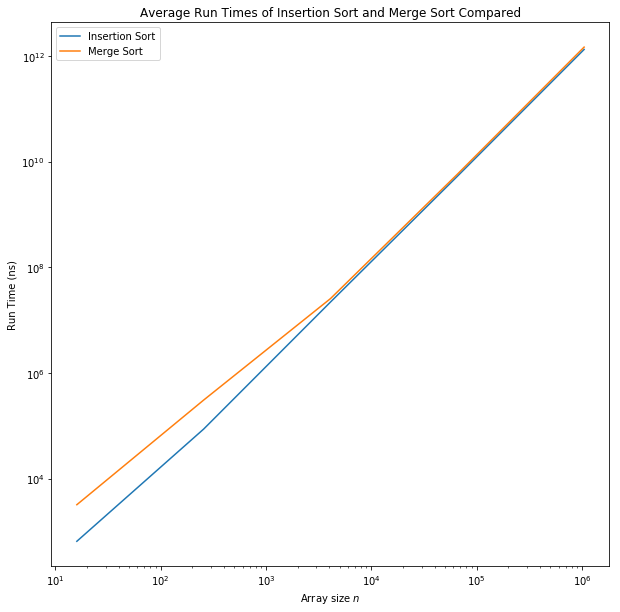

In [14]:
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(xs, insertion_mean, label='Insertion Sort')
plt.plot(xs, merge_mean, label='Merge Sort')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array size $n$")
plt.ylabel('Run Time (ns)')
plt.title("Average Run Times of Insertion Sort and Merge Sort Compared")
plt.show()

In [11]:
table = "| $n$ | Insertion Sort | Merge Sort |\n|:---|:---:|:---:|\n"
for i in range(len(xs)):
    table += "| {n} | {ins:.5} | {ms:.5} |\n".format(
        n=xs[i], 
        ins=insertion_mean[i], 
        ms=merge_mean[i]
    )
IPython.display.Markdown(table)

| $n$ | Insertion Sort | Merge Sort |
|:---|:---:|:---:|
| 16 | 648.08 | 3194.6 |
| 256 | 8.6502e+04 | 3.0644e+05 |
| 4096 | 2.2011e+07 | 2.5577e+07 |
| 65536 | 5.2822e+09 | 5.7815e+09 |
| 1048576 | 1.3369e+12 | 1.4811e+12 |


## Notebook Cleanup/Additional Information

### This document was created with the following software versions:

In [12]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.4.final.0
python-bits: 64
OS: Linux
OS-release: 4.13.0-38-lowlatency
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.22.0
pytest: 3.3.2
pip: 9.0.1
setuptools: 38.4.0
Cython: 0.27.3
numpy: 1.14.0
scipy: 1.0.0
pyarrow: None
xarray: None
IPython: 6.2.1
sphinx: 1.6.6
patsy: 0.5.0
dateutil: 2.6.1
pytz: 2017.3
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.4
feather: None
matplotlib: 2.1.2
openpyxl: 2.4.10
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.1
bs4: 4.6.0
html5lib: 0.9999999
sqlalchemy: 1.2.1
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [5]:
%%javascript
// Hide "In [*]" prompts in notebook.
$('div.prompt').hide();

<IPython.core.display.Javascript object>